In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge



In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/co2_modified.csv')

In [ ]:
# Display basic information
print("Basic Information:")
df.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6671 non-null   object 
 1   Model                             6635 non-null   object 
 2   Vehicle Class                     6659 non-null   object 
 3   Engine Size(L)                    6630 non-null   float64
 4   Cylinders                         6656 non-null   float64
 5   Transmission                      6664 non-null   object 
 6   Fuel Type                         6655 non-null   object 
 7   Fuel Consumption City (L/100 km)  6617 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6669 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6646 non-null   float64
 10  Fuel Consumption Comb (mpg)       6647 non-null   float64
 11  CO2 Emissions(g/km)               6605 non-null   

In [ ]:
# Display the first few rows
print("First 5 rows:")
print(df.head())


First 5 rows:
    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0        4.0          AS5   
1  ACURA         ILX       COMPACT             2.4        4.0           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5        4.0          NaN   
3  ACURA         NaN   SUV - SMALL             3.5        6.0          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5        6.0          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0       NaN                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3       NaN                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2     

In [ ]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
Make                                714
Model                               750
Vehicle Class                       726
Engine Size(L)                      755
Cylinders                           729
Transmission                        721
Fuel Type                           730
Fuel Consumption City (L/100 km)    768
Fuel Consumption Hwy (L/100 km)     716
Fuel Consumption Comb (L/100 km)    739
Fuel Consumption Comb (mpg)         738
CO2 Emissions(g/km)                 780
dtype: int64


In [ ]:
# Summary statistics
print("Summary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
        Make      Model Vehicle Class  Engine Size(L)    Cylinders  \
count   6671       6635          6659     6630.000000  6656.000000   
unique    42       2000            16             NaN          NaN   
top     FORD  F-150 FFV   SUV - SMALL             NaN          NaN   
freq     554         31          1100             NaN          NaN   
mean     NaN        NaN           NaN        3.151192     5.622145   
std      NaN        NaN           NaN        1.354532     1.838428   
min      NaN        NaN           NaN        0.900000     3.000000   
25%      NaN        NaN           NaN        2.000000     4.000000   
50%      NaN        NaN           NaN        3.000000     6.000000   
75%      NaN        NaN           NaN        3.700000     6.000000   
max      NaN        NaN           NaN        8.400000    16.000000   

       Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
count          6664      6655                       6617.000000   
uniqu

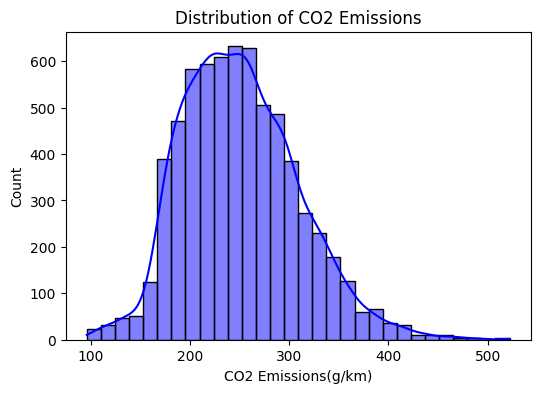

In [ ]:
# Distribution of CO2 Emissions
plt.figure(figsize=(6, 4))
sns.histplot(df['CO2 Emissions(g/km)'], bins=30, kde=True, color='blue')
plt.title("Distribution of CO2 Emissions")
plt.show()

<ipython-input-43-3c48e7a8f181>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, order=df[feature].value_counts().index[:10], palette='viridis')


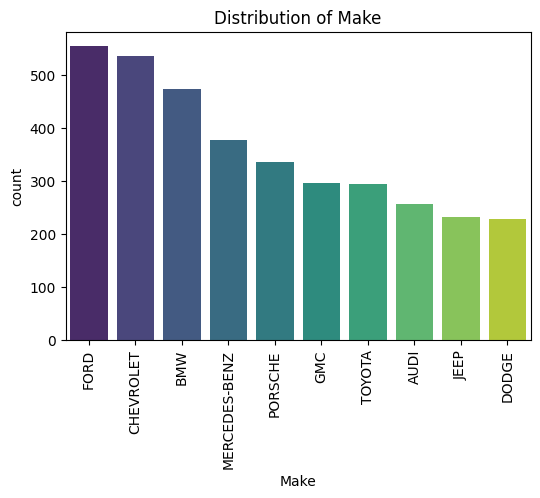

<ipython-input-43-3c48e7a8f181>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, order=df[feature].value_counts().index[:10], palette='viridis')


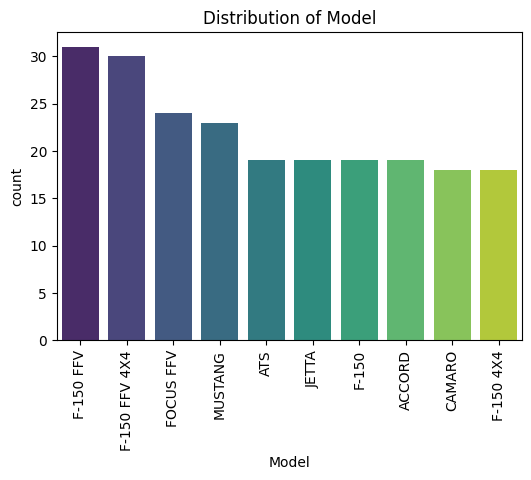

<ipython-input-43-3c48e7a8f181>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, order=df[feature].value_counts().index[:10], palette='viridis')


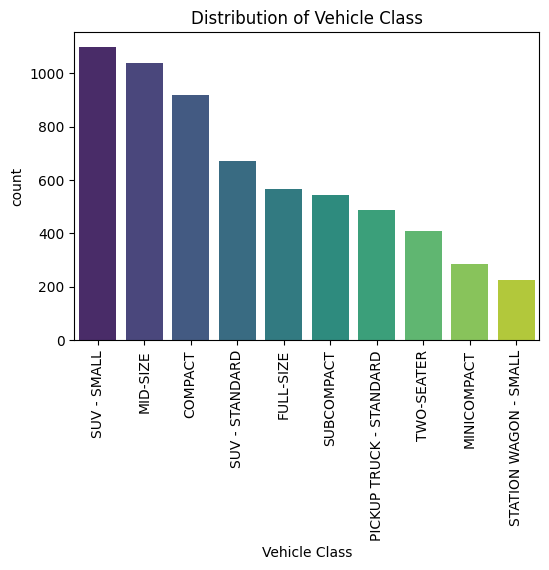

<ipython-input-43-3c48e7a8f181>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, order=df[feature].value_counts().index[:10], palette='viridis')


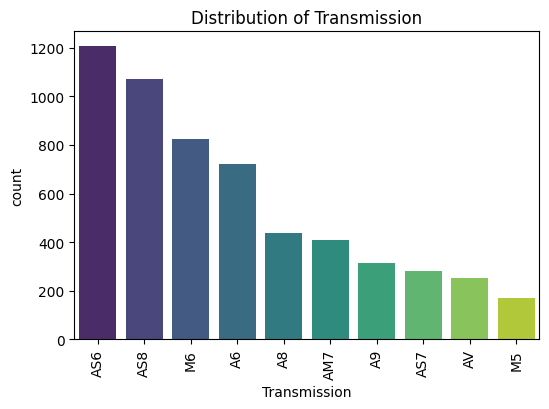

<ipython-input-43-3c48e7a8f181>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, order=df[feature].value_counts().index[:10], palette='viridis')


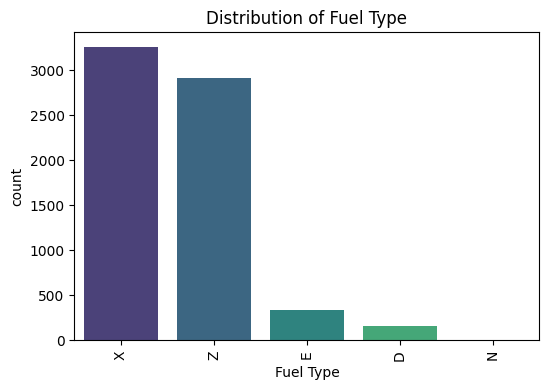

In [ ]:
# Bar plot for categorical variables
categorical_features = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=df, order=df[feature].value_counts().index[:10], palette='viridis')
    plt.xticks(rotation=90)
    plt.title(f"Distribution of {feature}")
    plt.show()

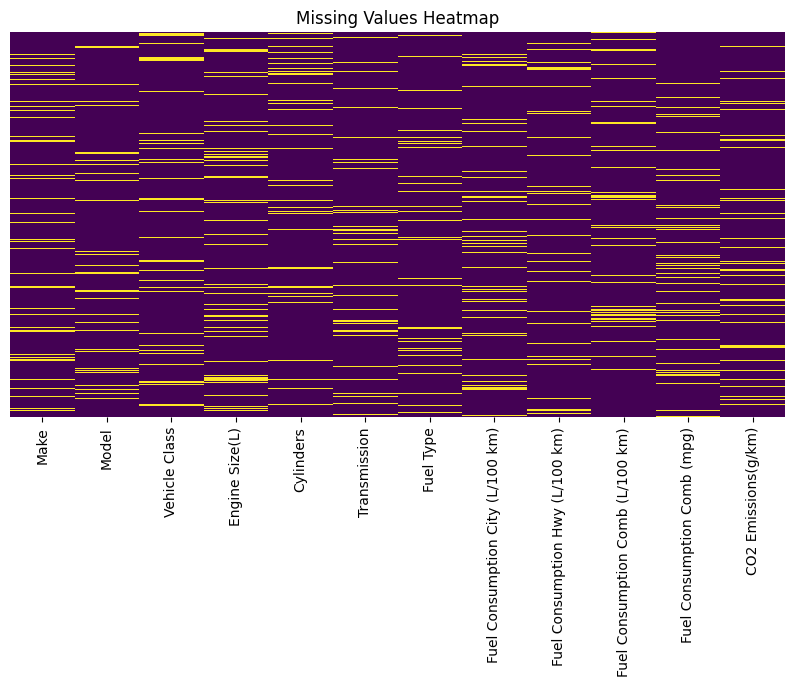

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


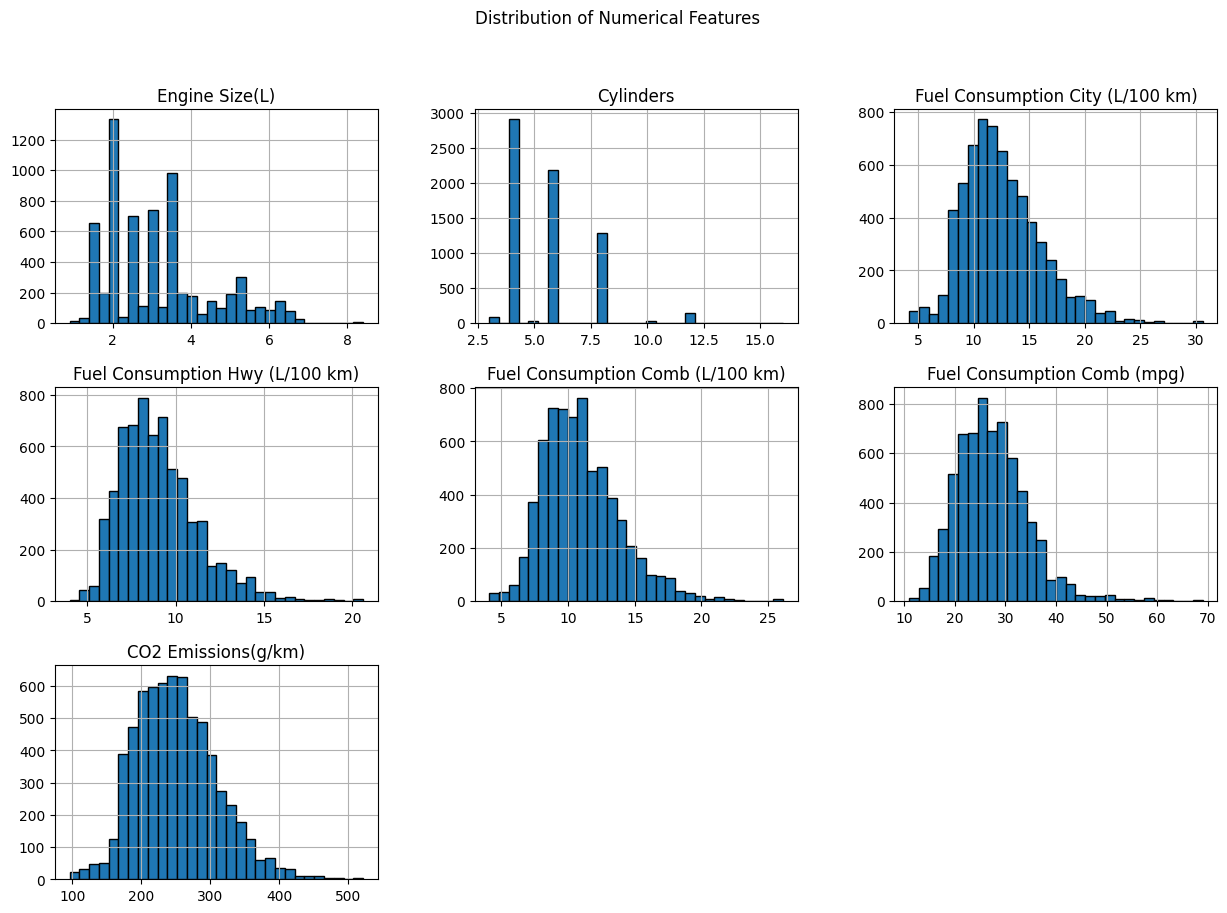

In [ ]:
# Visualizing the distribution of CO2 Emissions before handling outliers
# Histogram for numerical features
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

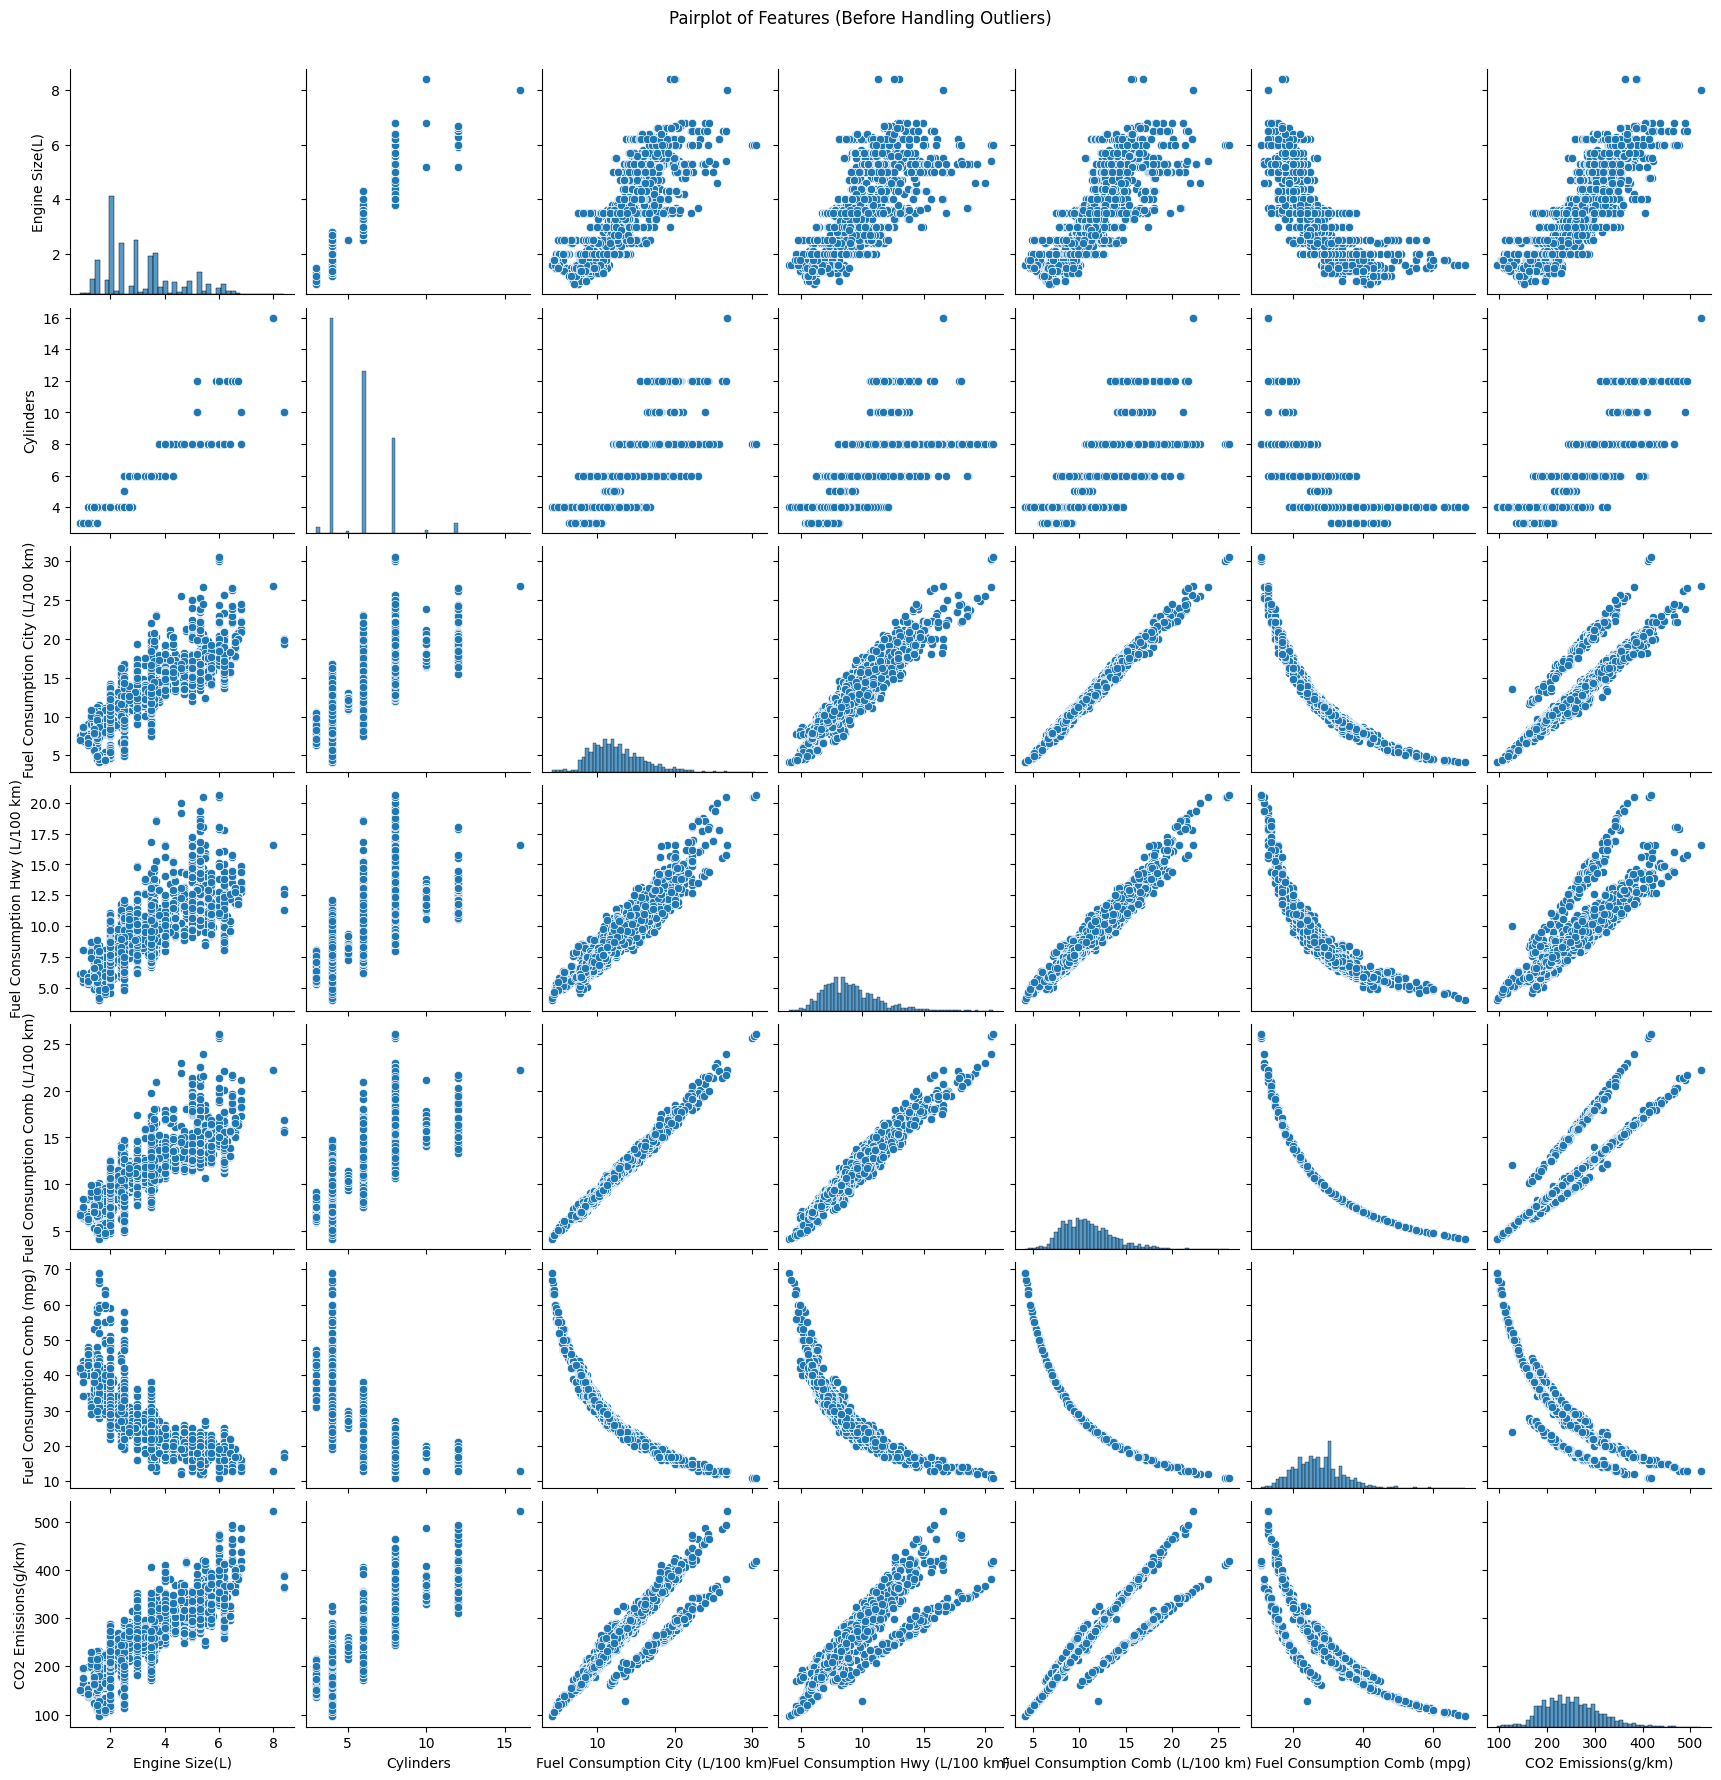

In [ ]:
# Visualizing relationships between features before handling outliers
sns.pairplot(df)
plt.suptitle("Pairplot of Features (Before Handling Outliers)", y=1.02)
plt.show()

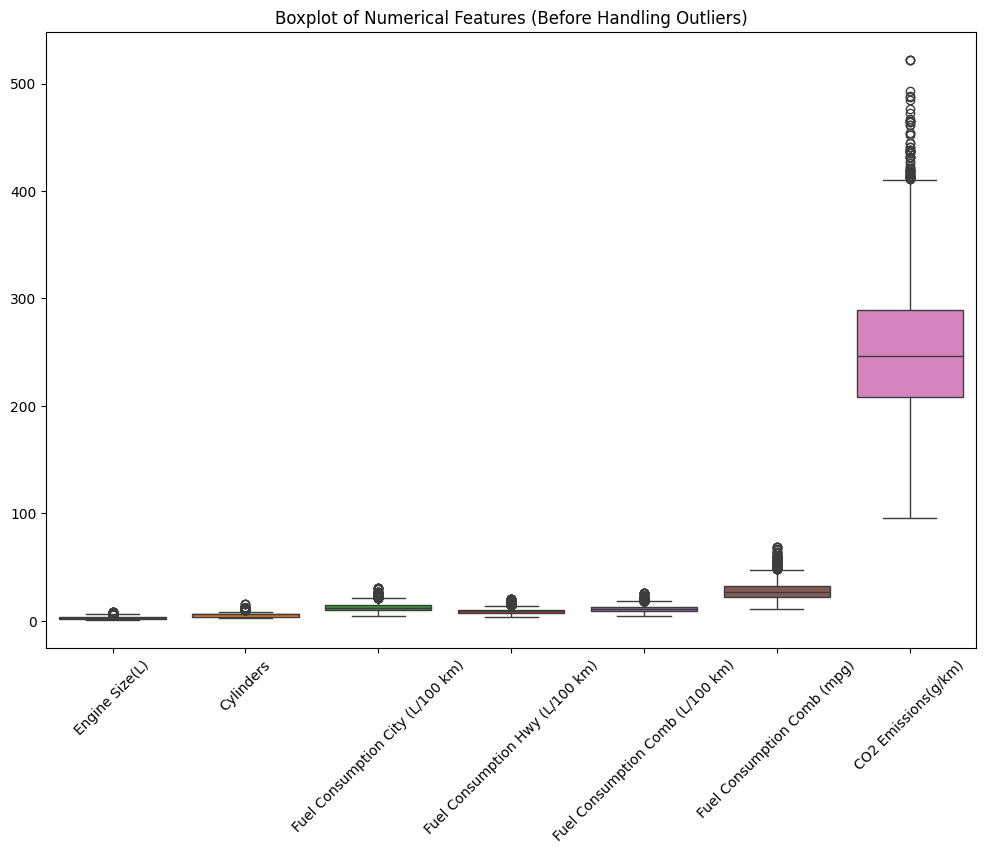

In [ ]:
# Boxplot of numerical features before handling outliers
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Features (Before Handling Outliers)')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

In [ ]:
# Fill NA/Null values (Before capping outliers)
# Handling missing values (Filling numeric columns with median and categorical with mode)
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)


print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


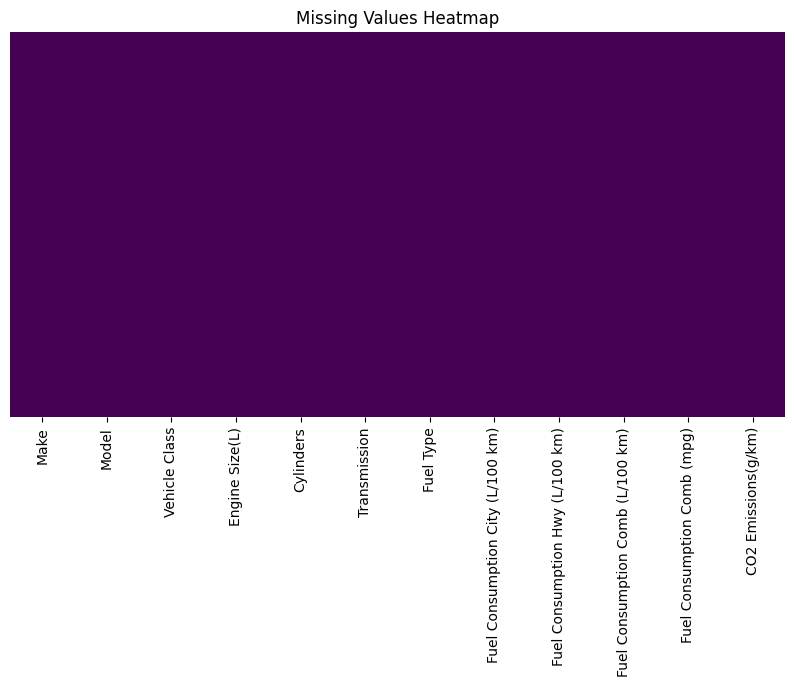

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
# Capping outliers based on the 1st and 99th percentile
def cap_outliers(df, numerical_cols, lower_percentile=1, upper_percentile=99):
    for col in numerical_cols:
        lower_limit = np.percentile(df[col], lower_percentile)
        upper_limit = np.percentile(df[col], upper_percentile)
        df[col] = np.clip(df[col], lower_limit, upper_limit)
    return df

# Apply capping (1st and 99th percentile)
df = cap_outliers(df, numerical_cols)



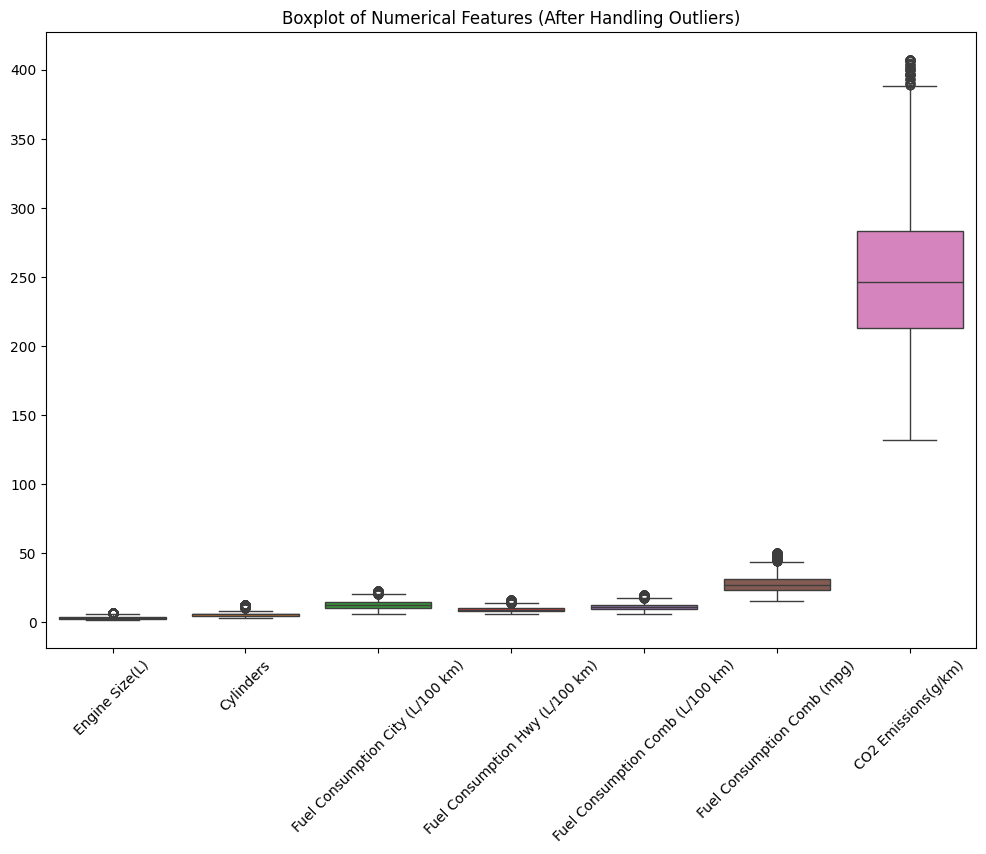

In [ ]:
# Boxplot of numerical features after handling outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot of Numerical Features (After Handling Outliers)')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()



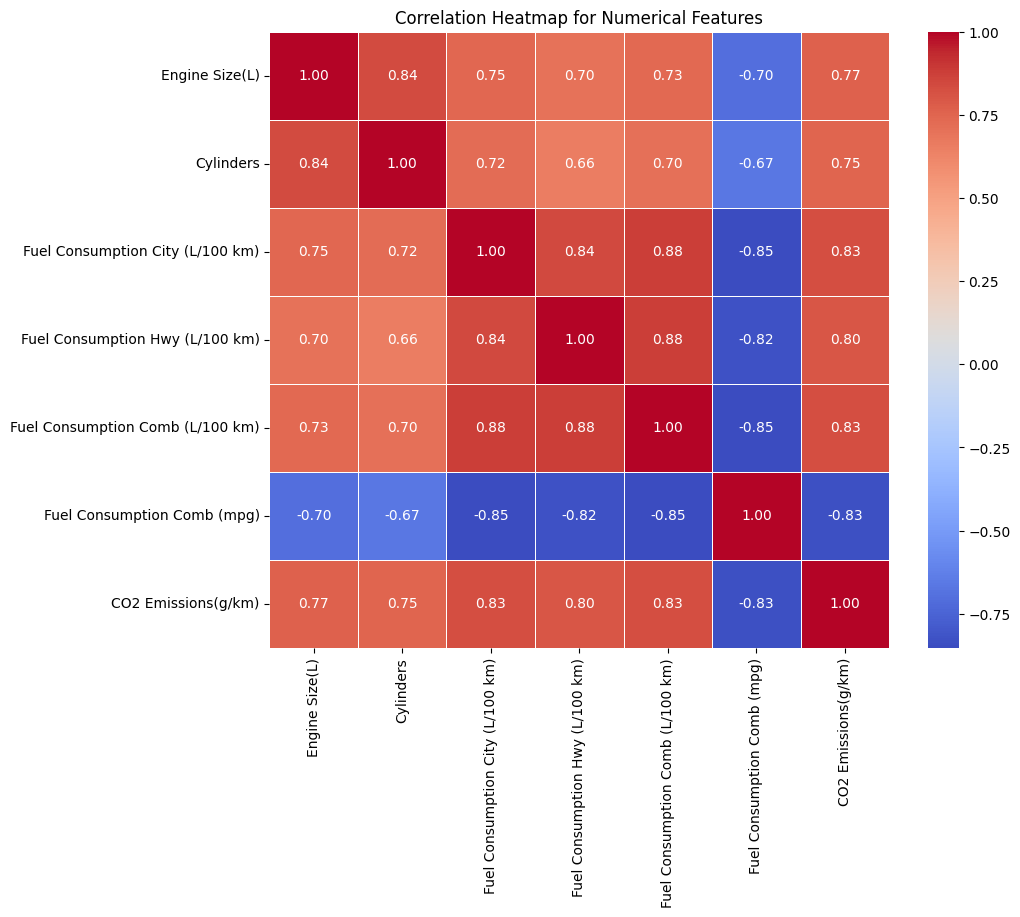

In [ ]:
# Correlation heatmap for numerical features only
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()  # Select numerical columns only
corr_matrix = df[numerical_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()



In [ ]:
# One-Hot Encoding for categorical columns
df = pd.get_dummies(df, columns=['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], drop_first=True)

# Splitting dataset
X = df.drop(columns=["CO2 Emissions(g/km)"])  # Features
y = df["CO2 Emissions(g/km)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Add bias term
X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

def cost_function(X, Y, W):
    m = len(Y)
    Y_pred = np.dot(X, W)
    cost = (1 / (2 * m)) * np.sum((Y_pred - Y) ** 2)
    return cost

def gradient_descent(X, Y, W, alpha, iterations):
    m = len(Y)
    cost_history = []
    for i in range(iterations):
        Y_pred = np.dot(X, W)
        loss = Y_pred - Y
        gradient = (1 / m) * np.dot(X.T, loss)
        W -= alpha * gradient
        cost = cost_function(X, Y, W)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
    return W, cost_history

def rmse(Y, Y_pred):
    return np.sqrt(mean_squared_error(Y, Y_pred))

Iteration 0: Cost = 32068.0229
Iteration 100: Cost = 4274.3994
Iteration 200: Cost = 686.2313
Iteration 300: Cost = 204.3377
Iteration 400: Cost = 138.8743
Iteration 500: Cost = 129.5067
Iteration 600: Cost = 127.8363
Iteration 700: Cost = 127.3087
Iteration 800: Cost = 127.0070
Iteration 900: Cost = 126.7855
Iteration 1000: Cost = 126.6107
Iteration 1100: Cost = 126.4687
Iteration 1200: Cost = 126.3515
Iteration 1300: Cost = 126.2535
Iteration 1400: Cost = 126.1706


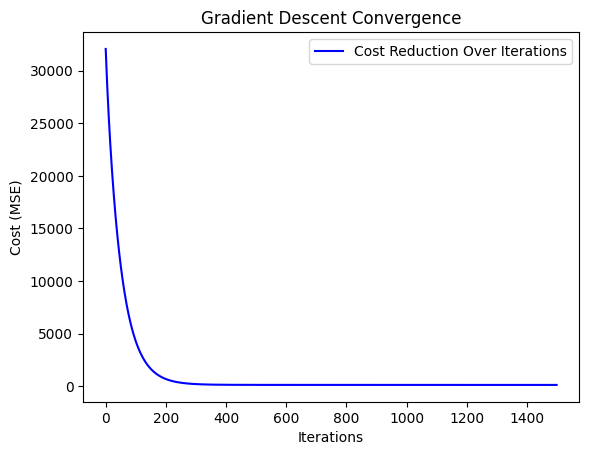

Final Weights: [2.50597424e+02 6.54046188e+00 7.29593072e+00 ... 0.00000000e+00
 2.46359892e-01 1.32629198e+00]
MSE on Training Set: 252.20112114179173
RMSE on Training Set: 15.88084132348761
R-Squared on Training Set: 0.9129230714117422

MSE on Test Set: 490.2646493943485
RMSE on Test Set: 22.141920634722464
R-Squared on Test Set: 0.8393779467712206


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

def main():
    W = np.zeros(X_train_bias.shape[1])
    alpha = 0.01
    iterations = 1500
    W_optimal, cost_history = gradient_descent(X_train_bias, y_train.values, W, alpha, iterations)

    # Plot cost function over iterations
    plt.plot(range(iterations), cost_history, label='Cost Reduction Over Iterations', color='blue')
    plt.xlabel('Iterations')
    plt.ylabel('Cost (MSE)')
    plt.title('Gradient Descent Convergence')
    plt.legend()
    plt.show()

    # Predictions
    Y_pred_train = np.dot(X_train_bias, W_optimal)
    Y_pred_test = np.dot(X_test_bias, W_optimal)

    # Training metrics
    train_mse = mean_squared_error(y_train, Y_pred_train)
    train_rmse = np.sqrt(train_mse)  # RMSE
    train_r2 = r2_score(y_train, Y_pred_train)

    # Test metrics
    test_mse = mean_squared_error(y_test, Y_pred_test)
    test_rmse = np.sqrt(test_mse)  # RMSE
    test_r2 = r2_score(y_test, Y_pred_test)

    # Print results
    print("Final Weights:", W_optimal)
    print("MSE on Training Set:", train_mse)
    print("RMSE on Training Set:", train_rmse)
    print("R-Squared on Training Set:", train_r2)
    print()
    print("MSE on Test Set:", test_mse)
    print("RMSE on Test Set:", test_rmse)
    print("R-Squared on Test Set:", test_r2)

if __name__ == "__main__":
    main()


In [ ]:

def compare_models(model1_name, model1_pred, model2_name, model2_pred):
    mse1, mse2 = mean_squared_error(y_test, model1_pred), mean_squared_error(y_test, model2_pred)
    r2_1, r2_2 = r2_score(y_test, model1_pred), r2_score(y_test, model2_pred)
    rmse1, rmse2 = np.sqrt(mse1), np.sqrt(mse2)
    mae1, mae2 = mean_absolute_error(y_test, model1_pred), mean_absolute_error(y_test, model2_pred)

    print(f"\nComparison: {model1_name} vs {model2_name}")
    print(f"{'-'*40}")
    print(f"MSE:  {model1_name} = {mse1:.4f}, {model2_name} = {mse2:.4f}")
    print(f"RMSE: {model1_name} = {rmse1:.4f}, {model2_name} = {rmse2:.4f}")
    print(f"MAE:  {model1_name} = {mae1:.4f}, {model2_name} = {mae2:.4f}")
    print(f"R² Score: {model1_name} = {r2_1:.4f}, {model2_name} = {r2_2:.4f}")

    # Decide the better model
    if r2_1 > r2_2:
        print(f"\n{model1_name} performed better! ")
    elif r2_2 > r2_1:
        print(f"\n{model2_name} performed better! ")
    else:
        print("\nBoth models performed equally well.")

In [ ]:
# Train sklearn models Random Forest
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

In [ ]:
# Evaluate models before hyperparameter tuning
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Model Performance:")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"R2 Score: {r2_score(y_true, y_pred):.4f}\n")

evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Linear Regression", y_test, y_pred_lin)

compare_models("Random Forest", y_pred_rf, "Linear Regression", y_pred_lin)

Random Forest Model Performance:
MSE: 352.5476
MAE: 9.0365
RMSE: 18.7763
R2 Score: 0.8845

Linear Regression Model Performance:
MSE: 515.1199
MAE: 14.6376
RMSE: 22.6963
R2 Score: 0.8312


Comparison: Random Forest vs Linear Regression
----------------------------------------
MSE:  Random Forest = 352.5476, Linear Regression = 515.1199
RMSE: Random Forest = 18.7763, Linear Regression = 22.6963
MAE:  Random Forest = 9.0365, Linear Regression = 14.6376
R² Score: Random Forest = 0.8845, Linear Regression = 0.8312

Random Forest performed better! 


In [ ]:
# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [10],  # Number of trees
    'max_depth': [10],  # Maximum depth of the tree
    'min_samples_split': [2],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1],  # Minimum number of samples required to be at a leaf node
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_


# Hyperparameters for Linear Regression (Ridge is used for regularization)
param_grid_linear = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}  # Regularization strength

# Use Ridge Regression as it allows regularization
ridge_model = Ridge()

# Perform GridSearchCV
grid_search_lin= GridSearchCV(estimator=ridge_model, param_grid=param_grid_linear, cv=5, scoring='r2')
grid_search_lin.fit(X_train, y_train)
best_lin = grid_search_lin.best_estimator_


# Print best hyperparameters
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("Best Hyperparameters for Linear Regression:", grid_search_lin.best_params_)


Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best Hyperparameters for Linear Regression: {'alpha': 10.0}


In [ ]:
# Feature Selection using Pearson Correlation
corr_matrix = df.corr()
corr_target = corr_matrix["CO2 Emissions(g/km)"].abs().sort_values(ascending=False)
selected_features = corr_target[corr_target > 0.5].index.tolist()
selected_features.remove("CO2 Emissions(g/km)")

print("Selected Features:", selected_features)

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

Selected Features: ['Fuel Consumption Comb (mpg)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Engine Size(L)', 'Cylinders']


In [ ]:
# Retrain tuned model with selected features
best_rf.fit(X_train_selected, y_train)
y_pred_final_rf = best_rf.predict(X_test_selected)

best_lin.fit(X_train_selected, y_train)
y_pred_final_lin = best_lin.predict(X_test_selected)

In [ ]:
# Final Evaluation
evaluate_model("Tuned Random Forest", y_test, y_pred_final_rf)
evaluate_model("Tuned Linear Regression", y_test, y_pred_final_lin)

compare_models("Tuned Random Forest", y_pred_final_rf, "Tuned Linear Regression", y_pred_final_lin)

Tuned Random Forest Model Performance:
MSE: 419.8636
MAE: 11.2422
RMSE: 20.4906
R2 Score: 0.8624

Tuned Linear Regression Model Performance:
MSE: 576.3254
MAE: 16.2849
RMSE: 24.0068
R2 Score: 0.8112


Comparison: Tuned Random Forest vs Tuned Linear Regression
----------------------------------------
MSE:  Tuned Random Forest = 419.8636, Tuned Linear Regression = 576.3254
RMSE: Tuned Random Forest = 20.4906, Tuned Linear Regression = 24.0068
MAE:  Tuned Random Forest = 11.2422, Tuned Linear Regression = 16.2849
R² Score: Tuned Random Forest = 0.8624, Tuned Linear Regression = 0.8112

Tuned Random Forest performed better! 


  Conclusion

1. Model Performance:

    Several models were evaluated to predict CO2 emissions.


*   The Tuned Random Forest model outperformed other models, achieving an MSE of 419.86, RMSE of 20.49, MAE of 11.24, and an R² score of 0.8624.
*   
The Tuned Linear Regression model, while still performing well, had a higher MSE of 576.33, RMSE of 24.01, MAE of 16.28, and an R² score of 0.8112.
*   After hyperparameter tuning, the Random Forest model showed a significant reduction in error metrics and an increase in R², making it the superior choice.

2. Impact of Methods:


*   Techniques like hyperparameter tuning and feature selection had a substantial impact on model performance.


*   Hyperparameter tuning (using GridSearchCV) optimized the Random Forest model, leading to better accuracy and reduced error compared to the Linear Regression model.
*   Feature selection helped refine the models by eliminating less relevant variables, further boosting the performance of Random Forest.
As a result, the Tuned Random Forest model demonstrated lower MSE, RMSE, and MAE, along with a higher R² score, confirming its robustness.

3. Insights and Future Directions:


*  The experiment confirmed that Random Forest is more accurate and reliable than Linear Regression for predicting CO2 emissions.

* Hyperparameter tuning and feature selection played a crucial role in improving model performance.
*  
Future research could explore even more advanced models, such as XGBoost or Neural Networks, and experiment with additional feature engineering techniques to further enhance predictive power.







